# Using the OpenAI gym

In this notebook we'll play around with two RL agents in OpenAI gym - CartPole and MountainCar

In [ ]:
!pip install gymnasium stable-baselines3[extra] matplotlib


# CartPole

This code simulates and visualizes the CartPole-v1 environment from Gymnasium, using random actions to control the pole’s movement while capturing frames for an animation. It starts by initializing the CartPole-v1 environment with RGB rendering mode, then resets the environment to get the initial state. The agent interacts with the environment in a loop, selecting random actions and capturing rendered frames at each step. The loop continues until the environment terminates (pole falls) or truncates (max steps reached). After closing the environment, the collected frames are converted into an animation using Matplotlib, with each frame updating dynamically in the FuncAnimation function. Finally, the animation is rendered as an interactive HTML element for visualization within a Jupyter Notebook. This setup allows users to visually inspect the CartPole environment’s behavior when controlled by a random agent.

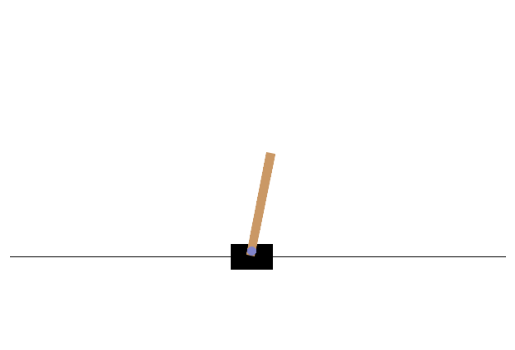

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create the environment with RGB array rendering
env = gym.make('CartPole-v1', render_mode="rgb_array")

# Initialize variables
obs, info = env.reset()
done = False
frames = []

# Run the environment
while not done:
    # Capture the current frame
    frame = env.render()
    frames.append(frame)

    # Take a random action
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()

# Create an animation from the frames
fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(frames[0])

def update(frame):
    im.set_data(frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
HTML(ani.to_jshtml())


# MountainCar

This code simulates and visualizes the MountainCar-v0 environment from Gymnasium, where an underpowered car must build momentum to reach the top of a hill. The environment is initialized in RGB rendering mode, and the agent starts at a random position. A loop runs where the agent takes random actions, moving left or right to try to reach the goal, while capturing rendered frames of the environment at each step. The loop terminates when either the car reaches the goal (terminated=True) or the maximum number of steps is reached (truncated=True). After closing the environment, the collected frames are converted into an animation using Matplotlib's FuncAnimation, which updates the image dynamically. The animation is then displayed as an interactive HTML element, allowing users to visually inspect how the MountainCar agent performs with random actions.

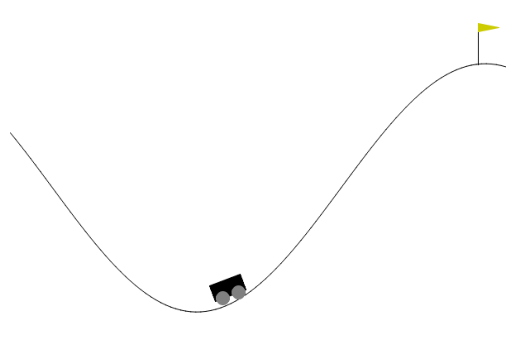

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Create the MountainCar environment with RGB array rendering
env = gym.make('MountainCar-v0', render_mode="rgb_array")

# Initialize variables
obs, info = env.reset()
done = False
frames = []

# Run the environment with random actions
while not done:
    # Capture the current frame
    frame = env.render()
    frames.append(frame)

    # Take a random action
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()

# Create and display the animation
fig, ax = plt.subplots()
ax.axis("off")
im = ax.imshow(frames[0])

def update(frame):
    im.set_data(frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=frames, interval=50, blit=True)
HTML(ani.to_jshtml())
